In [91]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
import matplotlib.pyplot as plt
%matplotlib inline

Function to do a bar plot of the magnitudes of the discrete Fourier coefficients

In [176]:
def do_plot(n, data, part=0):
    plt.rcParams["figure.figsize"] = (8,4)
    
    #Extract the Fourier coefficients
    F = fft(data)/N #use convention from class for consistency
    
    #print the data/DFT
    #print('Time domain: ', f)
    #print('Frequency domain: ', F)
    
    #plot the data/DFT
    plt.subplot(1, 2, 1)
    plt.plot(data)
    plt.title('Time domain')
    plt.subplot(1, 2, 2)
    plt.title('Frequency domain')
    plt.ylim(-np.max(abs(f)), np.max(abs(f))) #set the plot range to the max of data values
    if(part == 0):
        plt.bar(n,abs(F))
    elif (part == 1):
        plt.bar(n,F.real)
    else:
        plt.bar(n,F.imag)
    plt.show()

Set up integer indices $n$ for a finite data set of some length $N.$

In [174]:
N = 16
n = np.linspace(0, N-1, num=N)
print(n)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


Set up various data sets and visualize their DFTs.

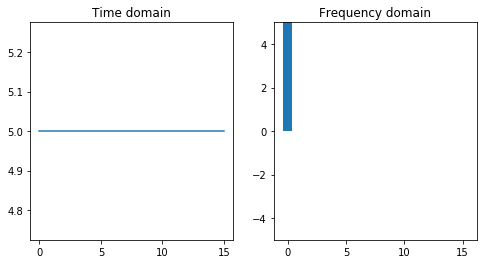

In [177]:
f = 5*np.ones(N);  #Constant value
do_plot(n,f)

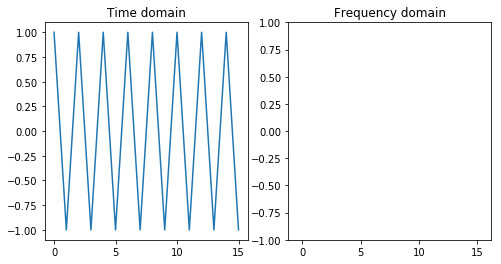

In [182]:
k = 2 #try 2, 4, 6, 10, 16
#k = 4
#k = 6
#k = 10
#k = 16
f = np.cos(k*np.pi*n/N) #Cosine wave

do_plot(n,f) #plot magnitude 
#do_plot(n,f,1) #plot real part
#do_plot(n,f,2) #plot imaginary part

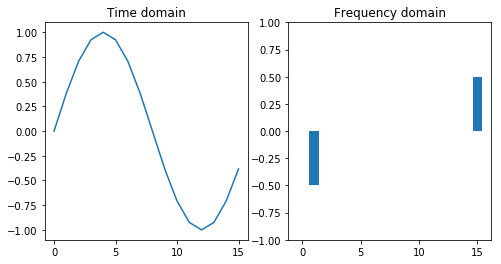

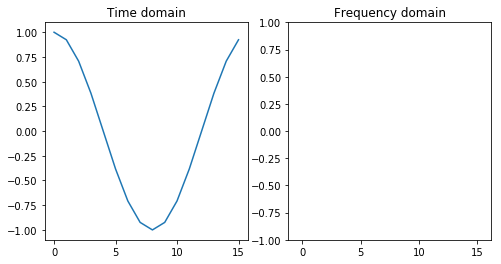

In [185]:
k=2
f = np.sin(k*np.pi*n/N) #Sine wave #Try the real/imaginary parts to see how it differs from cosine
g = np.cos(k*np.pi*n/N) #Cosine wave

do_plot(n,f,0)
do_plot(n,g,0)
#do_plot(n,f,1) #plot real part
#do_plot(n,f,2) #plot imaginary part


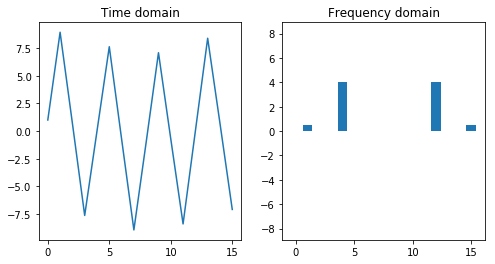

In [188]:
#Combination of sin/cosine of different frequencies and amplitudes
#Observe that two pairs of frequencies are active in the DFT plot
#Height of DFT coefficient is dictated by amplitude of the constituent waves
f=np.cos(2*np.pi*n/N)+8*np.sin(8*np.pi*n/N)
do_plot(n,f)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


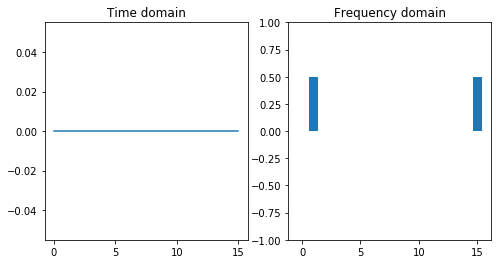

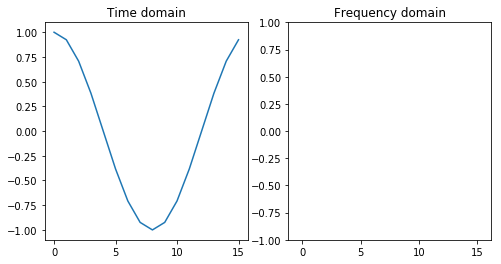

In [191]:
#Wave consisting of purely imaginary data (using 1j for imaginary number "i")
#(The warning that occurs is because we are implicitly plotting only the real part of the data in the time domain.)
f = 1j*np.cos(2*np.pi*n/N)
g = np.cos(2*np.pi*n/N)
do_plot(n,f)
do_plot(n,g)
#again look at the real/imaginary parts
#do_plot(n,f,1)
#do_plot(n,g,2)

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


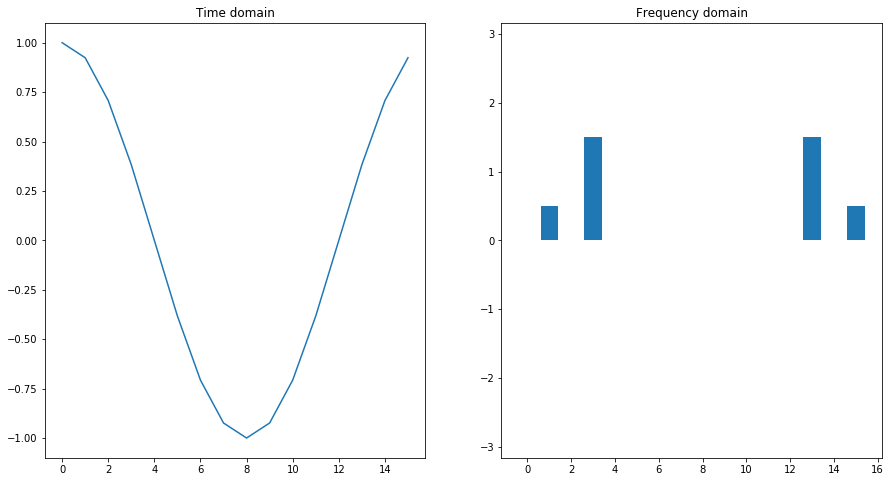

In [135]:
#Wave consisting of both real and imaginary data of different frequencies/amplitudes.
f=np.cos(2*np.pi*n/N) + 1j*3*np.cos(6*np.pi*n/N)
do_plot(n,f)

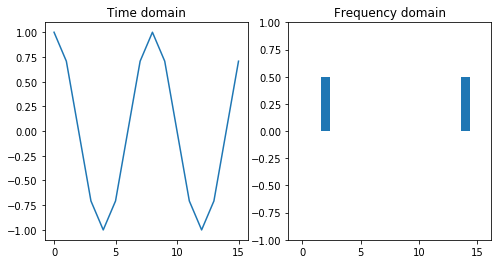

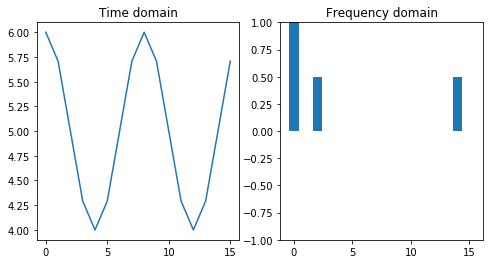

In [192]:
#Observe that adding a constant to all of the data affects only the F[0] i.e., "DC" coefficient.
f = np.cos(4*np.pi*n/N) #Cosine wave
g = np.cos(4*np.pi*n/N)+5 #Cosine wave shifted up.
do_plot(n,f)
do_plot(n,g)

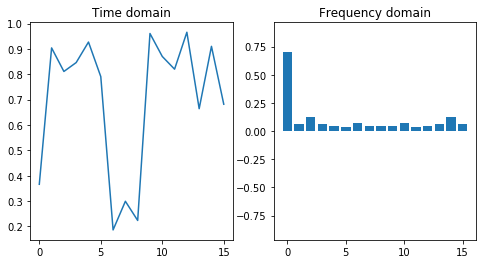

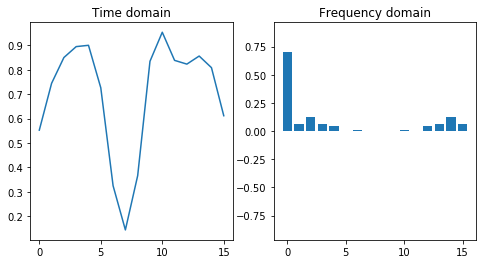

In [195]:
#Try processing some random data in the Fourier/frequency domain
f = np.random.rand(N)
do_plot(n,f)

F = fft(f)/N #do the DFT

F[5:12] = 0.1*F[5:12] #scale down some high frequency coefficients
#F[0] = 2 #Shift the average value of f to be 2

g = (N*ifft(F)).real #invert the DFT, and grab only the real part to visualize

do_plot(n,g)